# Identifying Important Features Affecting Melbourne House Price By Regression Model

## Data Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
print(df.shape)

(34857, 21)


In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [6]:
## Seems that Bedroom2 and Rooms are same feature, we check this out
df['Rooms - Bedroom2'] = df['Rooms'] - df['Bedroom2']
df['Rooms - Bedroom2']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        1.0
7        1.0
8       -2.0
9       -1.0
10       0.0
11      -1.0
12       0.0
13      -2.0
14       0.0
15       NaN
16       NaN
17       0.0
18      -1.0
19       NaN
20       0.0
21       NaN
22       NaN
23       0.0
24       0.0
25       0.0
26       NaN
27       NaN
28       0.0
29       0.0
        ... 
34827    0.0
34828    0.0
34829    NaN
34830    0.0
34831    0.0
34832    NaN
34833    0.0
34834    0.0
34835    0.0
34836    0.0
34837    0.0
34838    NaN
34839    NaN
34840    NaN
34841    0.0
34842    0.0
34843    0.0
34844    NaN
34845    0.0
34846    0.0
34847    0.0
34848    0.0
34849    0.0
34850    0.0
34851    0.0
34852    0.0
34853    0.0
34854    0.0
34855    NaN
34856    0.0
Name: Rooms - Bedroom2, Length: 34857, dtype: float64

In [7]:
## because the differce is negligible, we drop EITHER ONE
df = df.drop(['Bedroom2','Rooms - Bedroom2'],1)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


#### Categorial

In [8]:
df.select_dtypes(['object']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [9]:
obj2cat = ['Suburb', 'Address', 'Type', 'Method', 
           'SellerG', 'Date', 'CouncilArea','Regionname']
for col in obj2cat:
    df[col] = df[col].astype('category')

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

#### Numerical

In [11]:
df.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [12]:
num2cat = ['Postcode']
for col in num2cat:
    df[col]=df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 20 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(8), datetime64[ns](1), float64(10), int64(1)
memory usage: 5.

### Feature Engineering

In [17]:
# Add ['Age']
df['Age'] = 2018 - df['YearBuilt']

# Identify historic homes
df['Historic'] = np.where(df['Age']>=50,'Historic','Contemporary')

df['Historic']= df['Historic'].astype('category')

### Missing Values/Data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
Age              15551 non-null float64
Historic         34857 non-null catego

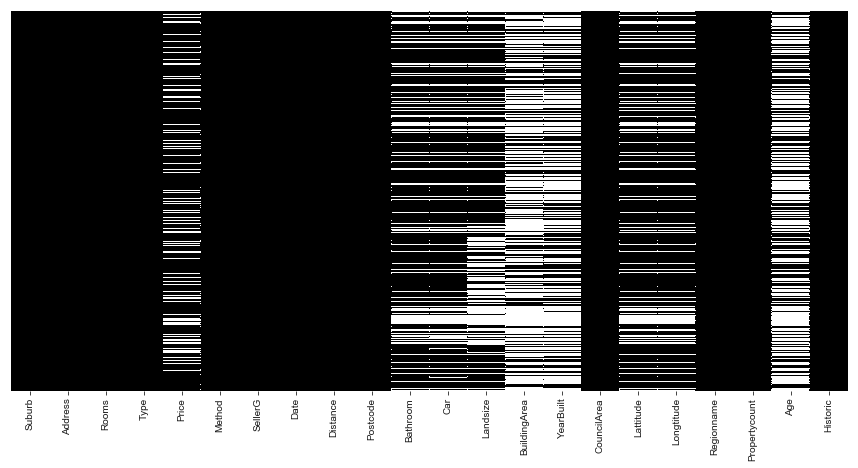

In [19]:
## searching some method in Internet to fill out missing value:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [20]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
Historic             0
dtype: int64

In [21]:
## % of missing value:
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
Historic          0.000000
dtype: float64

There are a significant amount of missing values in Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, and Longitude. To allow for a more complete analysis, observations missing any data will be removed from the dataset.

In [22]:
# drop out the row containing NaN
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
Suburb           8887 non-null category
Address          8887 non-null category
Rooms            8887 non-null int64
Type             8887 non-null category
Price            8887 non-null float64
Method           8887 non-null category
SellerG          8887 non-null category
Date             8887 non-null datetime64[ns]
Distance         8887 non-null float64
Postcode         8887 non-null category
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null category
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null category
Propertycount    8887 non-null float64
Age              8887 non-null float64
Historic         8887 non-null category
dtypes: category(9),

### Removing Outlier

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.0,3.098909e+00,0.963786,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,8887.0,1.092902e+06,679381.904112,131000.00000,641000.00000,900000.0000,1.345000e+06,9.000000e+06
Distance,8887.0,1.119989e+01,6.813402,0.00000,6.40000,10.2000,1.390000e+01,4.740000e+01
Bathroom,8887.0,1.646450e+00,0.721611,1.00000,1.00000,2.0000,2.000000e+00,9.000000e+00
Car,8887.0,1.692247e+00,0.975464,0.00000,1.00000,2.0000,2.000000e+00,1.000000e+01
Landsize,8887.0,5.234804e+02,1061.324228,0.00000,212.00000,478.0000,6.520000e+02,4.280000e+04
BuildingArea,8887.0,1.493095e+02,87.925580,0.00000,100.00000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8887.0,1.965753e+03,37.040876,1196.00000,1945.00000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8887.0,-3.780450e+01,0.090549,-38.17436,-37.85856,-37.7987,-3.774894e+01,-3.740720e+01
Longtitude,8887.0,1.449914e+02,0.118919,144.42379,144.92000,144.9985,1.450646e+02,1.455264e+02


In [31]:
## Landsize and BuiltArea == 0 is so weired 

In [32]:
df[df['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,...,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0,18.0,Contemporary
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,2017-03-09,9.7,3104.0,...,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0,69.0,Historic
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-03-09,12.1,3083.0,...,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0,48.0,Contemporary
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-03-09,20.6,3064.0,...,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0,18.0,Contemporary
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,2017-03-09,7.0,3071.0,...,120.0,0.0,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan,8870.0,18.0,Contemporary
22040,Prahran,6 Aberdeen Rd,3,h,1390000.0,S,Marshall,2017-08-19,4.6,3181.0,...,125.0,0.0,2002.0,Stonnington City Council,-37.85257,145.00296,Southern Metropolitan,7717.0,16.0,Contemporary
22507,Huntingdale,33 Beauford St,3,h,1205000.0,SA,FN,2017-09-23,12.3,3166.0,...,622.0,0.0,1960.0,Monash City Council,-37.90823,145.10851,Southern Metropolitan,768.0,58.0,Historic
22931,Balwyn North,1 Hosken St,5,h,2800000.0,S,Marshall,2017-08-26,9.7,3104.0,...,1173.0,0.0,1960.0,Boroondara City Council,-37.80385,145.09094,Southern Metropolitan,7809.0,58.0,Historic
22994,Brighton East,60 Cummins Rd,3,h,1650000.0,SP,Buxton,2017-08-26,10.3,3187.0,...,623.0,0.0,1920.0,Bayside City Council,-37.92698,145.02673,Southern Metropolitan,6938.0,98.0,Historic
23022,Bundoora,37 Greenwood Dr,4,h,815000.0,S,Ray,2017-08-26,12.1,3083.0,...,525.0,0.0,1965.0,Banyule City Council,-37.70765,145.05556,Northern Metropolitan,10175.0,53.0,Historic


In [33]:
df[df['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,...,0.0,94.00,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0,9.0,Contemporary
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,...,0.0,60.00,1970.0,Yarra City Council,-37.80150,144.99720,Northern Metropolitan,4019.0,48.0,Contemporary
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,...,0.0,50.00,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019.0,5.0,Contemporary
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,53.0,Historic
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,53.0,Historic
88,Airport West,13 Etzel St,3,h,805000.0,S,Nelson,2016-10-12,13.5,3042.0,...,0.0,105.00,1950.0,Moonee Valley City Council,-37.72170,144.87830,Western Metropolitan,3464.0,68.0,Historic
155,Albert Park,4a Gatehouse La,3,h,1370000.0,S,Greg,2016-12-06,3.3,3206.0,...,0.0,85.00,2000.0,Port Phillip City Council,-37.84510,144.95110,Southern Metropolitan,3280.0,18.0,Contemporary
177,Albert Park,13/52 Moubray St,1,u,442500.0,S,Marshall,2017-02-25,3.3,3206.0,...,0.0,34.00,1970.0,Port Phillip City Council,-37.84210,144.95170,Southern Metropolitan,3280.0,48.0,Contemporary
217,Alphington,5/5 Yarana Rd,2,u,390000.0,VB,Nelson,2016-05-22,6.4,3078.0,...,0.0,60.00,1960.0,Darebin City Council,-37.77730,145.03140,Northern Metropolitan,2211.0,58.0,Historic
219,Alphington,1/14 Fulham Rd,2,u,512000.0,S,Love,2017-02-25,6.4,3078.0,...,0.0,61.00,1965.0,Darebin City Council,-37.78050,145.02620,Northern Metropolitan,2211.0,53.0,Historic


In [35]:
# Remove outlier
df = df[df['BuildingArea']!=0]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,8842.0,3.096811e+00,0.964072,1.00000,2.000000,3.0000,4.000000e+00,1.200000e+01
Price,8842.0,1.092554e+06,679110.471353,131000.00000,641250.000000,900000.0000,1.345000e+06,9.000000e+06
Distance,8842.0,1.118741e+01,6.810991,0.00000,6.400000,10.2000,1.390000e+01,4.740000e+01
Bathroom,8842.0,1.645781e+00,0.722307,1.00000,1.000000,2.0000,2.000000e+00,9.000000e+00
Car,8842.0,1.691812e+00,0.976664,0.00000,1.000000,2.0000,2.000000e+00,1.000000e+01
Landsize,8842.0,5.229755e+02,1062.597994,0.00000,211.000000,477.0000,6.520000e+02,4.280000e+04
BuildingArea,8842.0,1.500694e+02,87.499764,1.00000,100.000000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8842.0,1.965692e+03,37.057287,1196.00000,1945.000000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8842.0,-3.780468e+01,0.090367,-38.17436,-37.858788,-37.7987,-3.774930e+01,-3.740720e+01
Longtitude,8842.0,1.449913e+02,0.118965,144.42379,144.919700,144.9983,1.450645e+02,1.455264e+02


## Analysis

Text(0.5,1,'Variable Correlation')

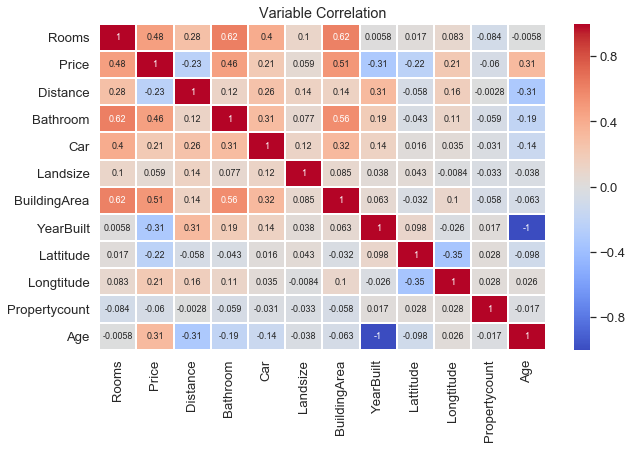

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Weak Positive Correlation: 

Age and Price

Moderate Positive Correlation:

Rooms and Price

Bathrooms and Price

Building Area and Price

The Rooms, Bathroom, and BuildingArea features are also moderately correlated with one another as they are all measures of home size.

## Linear Regression

In [39]:
df.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [40]:
# SPLIT
X = df[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
        'BuildingArea', 'Propertycount','Age']]
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [41]:
# Fit
from sklearn.linear_model import LinearRegression

rg = LinearRegression()

rg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_pred = rg.predict(X_test)

In [44]:
# Evaluating
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 312564.46670670627
MSE: 221083216258.25983
RMSE: 470194.8705146195


In [45]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5216286297986927


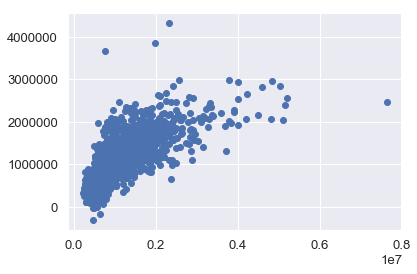

In [46]:

plt.scatter(y_test, y_pred)

C:\Users\yu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


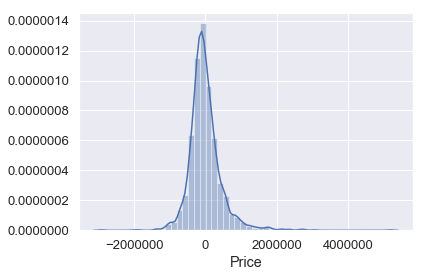

In [50]:
# Residuals
sns.distplot(y_test - y_pred)

In [65]:
coef = pd.DataFrame(data = rg.coef_, index = X.columns, columns = ['Coefficients'])
coef.sort_values('Coefficients', ascending=0)

,Coefficients
Bathroom,255950.485267
Rooms,130781.994615
Car,49936.398377
Age,5491.481614
BuildingArea,2160.118289
Landsize,24.128532
Propertycount,-1.229619
Distance,-28481.473952


## Conclusion

Bathroom>Rooms>Car>Distance>
Age>Building Area>LandSize>ProprtyCount